## What is *Finnegan's Wake*

Within literature, there is a category dubbed “literary nonsense” that combines elements that would make sense with those that do not with the intention to subvert language conventions or logical reasoning. Among the many authors who contributed to this “productive” nonsense, James Joyce was an interesting case who created a novel titled Finnegan’s Wake as an experiment in linguistic engineering in part due to his daughter who struggled with schizophrenia. In this story, Joyce spent seventeen years to create a colossal vocabulary of around 250,000 words deriving from 60 different languages along with nonsense strings of phonemes, with ones even having 100 letters. This concoction of various languages and sounds made the book extremely difficult, if not impossible to try to read. For some scholars,  such as Claude Shannon,  Finnegan’s Wake is can be seen as a stochastic experiment, stochastically producing language in a way that can be comparable to ChatGPT. Jacques Derrida, a French deconstructionist, interpreted the story as a “hypermnesiac machine” that was designed to anticipate possible options of what can be said in a language and include every conceivable combination of verbal elements. Considering all the different languages, mythology, and portmanteau words that were used in the novel, it would be interesting to see how much a computer can be trained to analyze and identify the different languages and inspirations Joyce took in order to create this piece. 

# Exploration for this Project

For this project, I aim to answer the question: <b>among the many complex words that were created and used in Finnegan’s Wake, what portion of them come from different languages</b>? Based on Derrida’s interpretation of the story, it would not be far off to believe that Joyce was repeating words but rather than just using synonyms to create variations of the same word, but that he would also include them with different languages so as to try not to repeat the words. Even amongst such repeated words, it would be interesting to find out what words are used the most, whether they’re in English or a different language. Because there is so much “nonsense” writing, I believe that there is much to uncover from the choices of words Joyce made the efforts to include and by examining the language used, one can better understand the complexity that is Finnegan’s Wake.

In order to tackle this project, I will need to begin by finding and using python to read an online copy of *Finnegan's Wake*. Once the file is opened and read, I can then proceed to tokenize and lemmatize the words, as well as eliminate stop words. From here, I can begin separating the different words by languages. This process will likely involve a lot of downloading since it will require the use of some sort of online database for the list of words in each language and then sifting through all the tokens to see which belong to which language.   

# Extracting the PDF for *Finnegan's Wake*

I had located some free downloadable PDF files of *Finnegan's Wake* so the first step was figuring out how to extract the PDF file and read it in the Jupyter Notebook. Luckily there are a lot of good resources for doing such with a simple Google search so I installed the following packages and proceeded to follow the steps indicated [from this website.](https://towardsdatascience.com/how-to-extract-keywords-from-pdfs-and-arrange-in-order-of-their-weights-using-python-841556083341)

In [1]:
#!pip install PyPDF2
#!pip install textract
#!pip install regex

In [52]:
import pandas as pd
import matplotlib.pyplot
import PyPDF2
import textract
import re

In order to read the file, I would need to start by with where we are in the directory and navigate appropriately to find the correct file to use the python <b>open()</b> function with. Once I was able to find the correct location, I utilized the code structure from the <b>Reading Text</b> section of the [same website I was using for reference](https://towardsdatascience.com/how-to-extract-keywords-from-pdfs-and-arrange-in-order-of-their-weights-using-python-841556083341) while making changes where they were needed (e.g. the file name, changing PdfFileReader to PdfReader since the former was removed from this version of PyPDF2, etc). 

In [3]:
%pwd

'C:\\Users\\kelly\\Desktop\\DigHum-Project'

In [4]:
pdfFileObj = open('../../Documents/Finnegans-Wake-Faber-Faber-1975.pdf','rb')               #open allows you to read the file
pdfReader = PyPDF2.PdfReader(pdfFileObj)   #The pdfReader variable is a readable object that will be parsed
num_pages = len(pdfReader.pages)                 #discerning the number of pages will allow us to parse through all the pages


count = 0
text = ""
                                                            
while count < num_pages:                       #The while loop will read each page
    pageObj = pdfReader.pages[count]
    count +=1
    text += pageObj.extract_text()
    
#Below if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.

if text != "":
    text = text
    
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
    text = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')

    # Now we have a text variable which contains all the text derived fro

With this, I now have all the text from *Finnegan's Wake* that I can start extracting data from. Although this will help greatly with the process, I will note here that this reading process did not result in the smoothest outcome as there are strangly a lot of spaces between the words that would interfere with the later processes. A quick visit to stackoverflow told me that this may be due to an improper coding of the PDF itself or the spaces are added by the original PDF creator that are invisible to the viewers but seen by extractors.

In [5]:
print(text[97:])

riverrun, past Eve and Adam’s, from swerve of shore to bend
of bay, brings us by a commodius vicus of recirculation back toHowth Castle and Environs.   Sir Tristram, violer d’amores, fr’over the short sea, had passen-core rearrived from North Armorica on this side the scraggyisthmus of Europe Minor to wielderﬁ  ght his penisolate war: nor
had topsawyer’s rocks by the stream Oconee exaggerated themselseto Laurens County’s gorgios while they went doublin their mumperall the time: nor avoice from aﬁ  re bellowsed mishe mishe to
tauftauf thuartpeatrick: not yet, though venissoon after, had akidscad buttended a bland old isaac: not yet, though all’s fair invanessy, were sosie sesthers wroth with twone nathandjoe. Rot apeck  o f  p a ’ s  mal t  had  J h e m  o r  S h e n  b r ew ed  b y  ar cligh t  an d  r o ryend to the regginbrow was to be seen ringsome on the aquaface.   Th e fall (bababadalgharaghtakamminarronnkonnbronntonner-
ronntuonnthunntrovarrhounawnskawntoohoohoordenenthur-nuk!) 

Before continuing, I decided to try a different PDF reading technique with a different package just to see if I could get a smoother text. If I would be unable to, then I would just stick with the one created prior since while it will interfere with the tokenizing process, in the end, the amount of words with the spacing errors cannot compare to the total amount of words of the whole text itself considering that there are 634 pages with thousands of words, meaning that the words with the spacing issues will likely be insignificant in the larger scheme of things. For the next attempt, I decided to try the package called PyMuPDF, rather than PyPDF2, with [this website as my guide.](https://artifex.com/blog/text-extraction-with-pymupdf)

In [6]:
!pip install PyMuPDF

In [7]:
import fitz 
doc = fitz.open('../../Documents/Finnegans-Wake-Faber-Faber-1975.pdf') # open a supported document
page = doc[6] # load the required page (0-based index)
#using page 6 here since that is where the actual text of the book starts
text = page.get_text() # extract plain text
print(text) # process or print it:

3
   riverrun, past Eve and Adam’s, from swerve of shore to bend
of bay, brings us by a commodius vicus of recirculation back to
Howth Castle and Environs.
   Sir Tristram, violer d’amores, fr’over the short sea, had passen-
core rearrived from North Armorica on this side the scraggy
isthmus of Europe Minor to wielderﬁ ght his penisolate war: nor
had topsawyer’s rocks by the stream Oconee exaggerated themselse
to Laurens County’s gorgios while they went doublin their mumper
all the time: nor avoice from aﬁ re bellowsed mishe mishe to
tauftauf thuartpeatrick: not yet, though venissoon after, had a
kidscad buttended a bland old isaac: not yet, though all’s fair in
vanessy, were sosie sesthers wroth with twone nathandjoe. Rot a
peck of pa’s malt had Jhem or Shen brewed by arclight and rory
end to the regginbrow was to be seen ringsome on the aquaface.
   Th e fall (bababadalgharaghtakamminarronnkonnbronntonner-
ronntuonnthunntrovarrhounawnskawntoohoohoordenenthur-
nuk!) of a once wallstra

At a glance, the text is much cleaner with less of the strange spaces that we saw with the previous PDF reader. This still isn't perfect as at a closer examination, there are still words with odd spaces such as "Th orp" or "fi ned", but it is overall much better than the previous text from earlier so this is the one that I will proceed to use for the project. 

In [8]:
all_text = chr(12).join([page.get_text() for page in doc]) #chr(12) is the ASCII control character for page-breaks
#this is meant to extract all document pages and concatenate their text with page breaks
all_text

'James\nJoyce\nFinnegans\nWake\nF A B E R  &  F A B E R ,  1 9 7 5\n\x0c\x0cJames\nJoyce\nFinnegans\nWake\nF A B E R  &  F A B E R ,  1 9 7 5\n\x0c\x0cI\n\x0c\x0c3\n   riverrun, past Eve and Adam’s, from swerve of shore to bend\nof bay, brings us by a commodius vicus of recirculation back to\nHowth Castle and Environs.\n   Sir Tristram, violer d’amores, fr’over the short sea, had passen-\ncore rearrived from North Armorica on this side the scraggy\nisthmus of Europe Minor to wielderﬁ ght his penisolate war: nor\nhad topsawyer’s rocks by the stream Oconee exaggerated themselse\nto Laurens County’s gorgios while they went doublin their mumper\nall the time: nor avoice from aﬁ re bellowsed mishe mishe to\ntauftauf thuartpeatrick: not yet, though venissoon after, had a\nkidscad buttended a bland old isaac: not yet, though all’s fair in\nvanessy, were sosie sesthers wroth with twone nathandjoe. Rot a\npeck of pa’s malt had Jhem or Shen brewed by arclight and rory\nend to the regginbrow was 

# Tokenizing and Sorting the Text

In [9]:
from string import punctuation
from collections import Counter
import spacy

In [10]:
punctuation += '—'
punctuation += "’"
punctuation += "'"
#added these to the string of punctuation after finding them to be problems later on
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—’\''

In [11]:
all_text = all_text.lower().strip() #.strip() gets rid of all the \n
for char in punctuation:
    all_text = all_text.replace(char, "")
print(all_text[:1000])

james
joyce
finnegans
wake
f a b e r    f a b e r   1 9 7 5
james
joyce
finnegans
wake
f a b e r    f a b e r   1 9 7 5
i
3
   riverrun past eve and adams from swerve of shore to bend
of bay brings us by a commodius vicus of recirculation back to
howth castle and environs
   sir tristram violer damores frover the short sea had passen
core rearrived from north armorica on this side the scraggy
isthmus of europe minor to wielderﬁ ght his penisolate war nor
had topsawyers rocks by the stream oconee exaggerated themselse
to laurens countys gorgios while they went doublin their mumper
all the time nor avoice from aﬁ re bellowsed mishe mishe to
tauftauf thuartpeatrick not yet though venissoon after had a
kidscad buttended a bland old isaac not yet though alls fair in
vanessy were sosie sesthers wroth with twone nathandjoe rot a
peck of pas malt had jhem or shen brewed by arclight and rory
end to the regginbrow was to be seen ringsome on the aquaface
   th e fall bababadalgharaghtakammi

In [12]:
#this text had a length of 1255196 where the maximum to try to lemmatize is 1000000
#thus I decided to split up all the tokens so I could process them separately
tokens1 = all_text[:1000001].split()
tokens2 = all_text[1000000:].split()
nlp = spacy.load("en_core_web_sm")
def lemmatize(tokens):
    words = ' '.join(tokens)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
lemmas1 = lemmatize(tokens1)
lemmas2 = lemmatize(tokens2)
print(lemmas1, lemmas2)

['james', 'joyce', 'finnegans', 'wake', 'f', 'a', 'b', 'e', 'r', 'f', 'a', 'b', 'e', 'r', '1', '9', '7', '5', 'jame', 'joyce', 'finnegans', 'wake', 'f', 'a', 'b', 'e', 'r', 'f', 'a', 'b', 'e', 'r', '1', '9', '7', '5', 'i', '3', 'riverrun', 'past', 'eve', 'and', 'adam', 'from', 'swerve', 'of', 'shore', 'to', 'bend', 'of', 'bay', 'bring', 'we', 'by', 'a', 'commodius', 'vicus', 'of', 'recirculation', 'back', 'to', 'howth', 'castle', 'and', 'environ', 'sir', 'tristram', 'viol', 'damore', 'frover', 'the', 'short', 'sea', 'have', 'passen', 'core', 'rearrive', 'from', 'north', 'armorica', 'on', 'this', 'side', 'the', 'scraggy', 'isthmus', 'of', 'europe', 'minor', 'to', 'wielderﬁ', 'ght', 'his', 'penisolate', 'war', 'nor', 'have', 'topsawyer', 'rock', 'by', 'the', 'stream', 'oconee', 'exaggerate', 'themselse', 'to', 'lauren', 'county', 'gorgio', 'while', 'they', 'go', 'doublin', 'their', 'mumper', 'all', 'the', 'time', 'nor', 'avoice', 'from', 'aﬁ', 're', 'bellowse', 'mishe', 'mishe', 'to', 't

In [13]:
stop = nlp.Defaults.stop_words
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
           'x', 'y', 'z']
for l in alphabet:
    stop.add(l)
stop.add('th')
stop.add('ﬁ')
stop.add('I')
stop.add('ﬂ')
#similar with the punctuation changes, added these to the set of stop words as they were also creating issues 

In [14]:
no_stops1 = [word for word in lemmas1 if word not in stop]
no_stops2 = [word for word in lemmas2 if word not in stop]
print(no_stops1, no_stops2)

['james', 'joyce', 'finnegans', 'wake', '1', '9', '7', '5', 'jame', 'joyce', 'finnegans', 'wake', '1', '9', '7', '5', '3', 'riverrun', 'past', 'eve', 'adam', 'swerve', 'shore', 'bend', 'bay', 'bring', 'commodius', 'vicus', 'recirculation', 'howth', 'castle', 'environ', 'sir', 'tristram', 'viol', 'damore', 'frover', 'short', 'sea', 'passen', 'core', 'rearrive', 'north', 'armorica', 'scraggy', 'isthmus', 'europe', 'minor', 'wielderﬁ', 'ght', 'penisolate', 'war', 'topsawyer', 'rock', 'stream', 'oconee', 'exaggerate', 'themselse', 'lauren', 'county', 'gorgio', 'doublin', 'mumper', 'time', 'avoice', 'aﬁ', 'bellowse', 'mishe', 'mishe', 'tauftauf', 'thuartpeatrick', 'venissoon', 'kidscad', 'buttende', 'bland', 'old', 'isaac', 'fair', 'vanessy', 'sosie', 'sesther', 'wroth', 'twone', 'nathandjoe', 'rot', 'peck', 'pas', 'malt', 'jhem', 'shen', 'brew', 'arclight', 'rory', 'end', 'regginbrow', 'ringsome', 'aquaface', 'fall', 'bababadalgharaghtakamminarronnkonnbronntonner', 'ronntuonnthunntrovarrho

In [15]:
no_stops = no_stops1 + no_stops2
len(no_stops)

113303

In [16]:
from collections import Counter
freq = Counter(no_stops)
freq.most_common(5)

[('like', 581), ('old', 488), ('time', 341), ('man', 338), ('oﬀ', 333)]

# Sorting Out the English Words

Now that I have tokenized and lammetized all the words, as well as removed all the English stopwords, the next step is to attempt to sort out all the English words and see how many words remain. In order to smooth along the process, I deicded to first make the list of non-stop words into a set in order to truly get all of the unique words. Then, I looked for any sources I could find for a list of all the English words in the dictionary. Luckily I was able to find a [Github](https://github.com/dwyl/english-words) where someone uploaded a list of 497,000 words, which considering how the Oxford English dictionary contains around 600,000 words and the Merriam-Webster dictionary, *Webster's Third New International Dictionary* states it contains 470,000 entries, is a fairly good starting point for this project. 

In [17]:
all_unique = set(no_stops)
len(all_unique)

51775

In [18]:
eng = open('../../Documents/DigHum Project Files/words.txt', 'r')
#txt file of 497k English words
dic_list = eng.read().splitlines()

In [19]:
eng_list = []
foreign_list = []
for w in all_unique:
    if (w in dic_list): 
        eng_list.append(w)
    else:
        foreign_list.append(w)

In [20]:
print(len(eng_list), len(foreign_list))

14116 37659


In [21]:
print(eng_list[:25])
print(foreign_list[:25])

['quoniam', 'simper', 'worldwide', 'meaning', 'comether', 'enclose', 'whet', 'pleasantry', 'accident', 'ordered', 'calumnious', 'bad', 'sepia', 'houseful', 'ague', 'miscegenation', 'leggy', 'exonerate', 'plex', 'nimb', 'appoint', 'gouty', 'atake', 'durian', 'drab']
['buntingcap', 'speagle', 'saon', 'bottombay', 'scriobbled', 'win', 'ebblybally', 'trouth', 'michelangelo', 'intendite', 'abbeygate', 'urrish', 'farum', 'sherious', 'isreal', 'leatherseller', 'skygrey', 'timor', 'salb', 'crumbend', 'carnier', 'clamatise', 'bibby', 'ghostwhite', 'popotte']


# Testing Out Other Languages

From the line above, there does seem to be a fairly good amount that got properly sorted. It is a bit difficult to try to decipher whether some of the words are actual foreign words, but that is why the next steps are to try to repeat the process that was done above for sorting out the English words but with other languages. Granted, it will not be completely accurate and there are some words that should be in the english list (e.g. warp, seahawk) or some that just look like made-up compound words, but it is still interesting to see what will come as a result of trying to put this list of words through another filter. In order to guide me through some list of words in other languages I attempted some of the more well known languages before searching up some lesser known languages through the different links provided in [this Wikipedia site.](https://en.wiktionary.org/wiki/Wiktionary%3aFrequency_lists)

## Irish

Starting with Irish, I anticipate that a good amount of the words in the foreign list will be filtered out from here because it is the language of the author's homecountry so he will likely know and use more words from here. 

In [22]:
#!pip install advertools
import advertools as adv
#I had attempted using stopwords.words("irish") but it did not appear to exist so I decided to try another package for 
#foreign language stop words

In [23]:
stop_irish = list(adv.stopwords['irish'])

In [24]:
ir = open('../../Documents/DigHum Project Files/irish_words.txt', encoding = "utf-8")
irish_words = ir.read().splitlines()

In [25]:
irish_words = irish_words[8:]

In [26]:
updated_iw = []
for i in irish_words:
    i = re.sub('\d+', '', i)
    i = re.sub(r'\s+', '', i)
    updated_iw.append(i)

In [27]:
irish = []
irish_stop = []
for f in foreign_list:
    if (f in stop_irish): 
        irish_stop.append(f)
        foreign_list.remove(f)
    elif (f in irish_words):
        irish.append(f)
        foreign_list.remove(f)

It was surprising that none of the words in the foreign list were actual Irish words, just containing some irish stop words.

In [28]:
print(len(irish), len(irish_stop), len(foreign_list))

0 19 37640


In [29]:
print(irish_stop)

['lena', 'gan', 'ag', 'ba', 'de', 'ach', 'don', 'mar', 'os', 'é', 'gach', 'agus', 'gur', 'sinn', 'na', 'dar', 'tar', 'sa', 'den']


## Exploring Other Languages from advertools

In order to speed along the process, I decided to look through the other languages provided by advertools and cross examine them with the ones that I could find in [these frequency lists of other languages](https://github.com/hermitdave/FrequencyWords/tree/master/content/2018) while also only focusing on the ones that had english lettering as compared to symbols like those found in Arabic, Bengali, or Chinese. I also excluded English and Irish from the list as I had already reviewed both languages.

In [75]:
rem_lang = list(adv.stopwords.keys())
cant_use = ['arabic', 'azerbaijani', 'bengali', 'chinese', 'english', 'greek', 'hindi', 'irish','japanese', 'kazakh', 'nepali', 
            'persian', 'russian', 'sinhala', 'tamil', 'tatar','telugu', 'thai', 'ukrainian', 'urdu']
rem_lang = [n for n in rem_lang if n not in cant_use]
rem_lang

['catalan',
 'croatian',
 'danish',
 'dutch',
 'finnish',
 'french',
 'german',
 'hebrew',
 'hungarian',
 'indonesian',
 'italian',
 'norwegian',
 'polish',
 'portuguese',
 'romanian',
 'spanish',
 'swedish',
 'tagalog',
 'turkish',
 'vietnamese']

Using the same technique as I did above for the filtering out the Irish words, Irish stop words, and the rest of the foreign words, I reformatted it to turn it into a defined function to make the process go smoother and faster for the rest of the languages. 
<br>
<b>for_lst</b> = the same foreign_list that I have been working with
<br>
<b>stop_lst</b> = the list of stop words in a particular language
<br>
<b>lang_list</b> = the list of all the words provided in the language from the txt files
<br>
<b>lang_stop</b> = a new list that is being appended to of the stop words in for_lst that match stop_lst
<br>
<b>lang</b> = a new list that is being appended to of the words in for_lst that match lang_list

In [31]:
def categorize(for_lst, stop_lst, lang_lst, lang_stop, lang):
    for f in for_lst:
        if (f in stop_lst): 
            lang_stop.append(f)
            for_lst.remove(f)
        elif (f in lang_lst):
            lang.append(f)
            for_lst.remove(f)

In [32]:
def strip(lst):
    for s in lst:
        s = re.sub('\s+\d+', '', s)
    return lst

In [33]:
make_var = vars()
count = 0
for l in rem_lang:
    stop_lst = list(adv.stopwords[l])
    print(count)
    op = open('../../Documents/DigHum Project Files/' + l + '.txt', encoding = "utf-8")
    print(count)
    lang_lst = op.read().splitlines()
    lang_lst = strip(lang_lst)
    make_var[l + '_stop'] = []
    make_var[l] = []
    categorize(foreign_list, stop_lst, lang_lst, make_var[l + '_stop'], make_var[l])
    count += 1
    print(count)
#ended up crashing and stopping at ukrainian, which I realized I failed to properly remove from the original list due to a typo

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


FileNotFoundError: [Errno 2] No such file or directory: '../../Documents/DigHum Project Files/ukrainian.txt'

In [35]:
lang_len = []
lang_len.append(len(eng_list))
lang_len.append(len(irish))
lang_len.append(len(catalan))
lang_len.append(len(croatian))
lang_len.append(len(danish))
lang_len.append(len(dutch))
lang_len.append(len(finnish))
lang_len.append(len(french))
lang_len.append(len(german))
lang_len.append(len(hebrew))
lang_len.append(len(hungarian))
lang_len.append(len(indonesian))
lang_len.append(len(italian))
lang_len.append(len(norwegian))
lang_len.append(len(polish))
lang_len.append(len(portuguese))
lang_len.append(len(romanian))
lang_len.append(len(spanish))
lang_len.append(len(swedish))
lang_len.append(len(tagalog))
lang_len.append(len(turkish))
#lang_len.append(len(vietnamese))

In [36]:
lang_stop_len = []
lang_stop_len.append(len(stop))
lang_stop_len.append(len(irish_stop))
lang_stop_len.append(len(catalan_stop))
lang_stop_len.append(len(croatian_stop))
lang_stop_len.append(len(danish_stop))
lang_stop_len.append(len(dutch_stop))
lang_stop_len.append(len(finnish_stop))
lang_stop_len.append(len(french_stop))
lang_stop_len.append(len(german_stop))
lang_stop_len.append(len(hebrew_stop))
lang_stop_len.append(len(hungarian_stop))
lang_stop_len.append(len(indonesian_stop))
lang_stop_len.append(len(italian_stop))
lang_stop_len.append(len(norwegian_stop))
lang_stop_len.append(len(polish_stop))
lang_stop_len.append(len(portuguese_stop))
lang_stop_len.append(len(romanian_stop))
lang_stop_len.append(len(spanish_stop))
lang_stop_len.append(len(swedish_stop))
lang_stop_len.append(len(tagalog_stop))
lang_stop_len.append(len(turkish_stop))
#lang_stop_len.append(len(vietnamese_stop))

In [37]:
print(len(foreign_list))

37066


# Visualizations

While I would like to explore more languages and try to identify more potential words to study, based off of the code I created with the for loop to deal with the remaining languages, the amount of text I have decided to use is far too much. Line 33 alone caused had to run for hours before it was finally finished. If I were to redo this project, I would probably only focus on the first 2, maybe 3, chapters of the novel rather than the full book like I ended up doing. Additionally, a big problem is that to try to identify what language is being used for certain words, I had to use large text files for lists of words of each language, making the cleaning and categorizing process for it very time-consuming. Granted, my repeated usage of for loops does not help this either because it has to repeatedly loop through each word for each language, making it take longer. I had made a big mistake here in using nested loops for such large data files when I should have used some different techniques such as hash tables to reduce the time complexity. Thus, I have decided to stop with the language categorization here with the ones I have and start wrapping up. 

In [45]:
len(irish_stop)

19

In [76]:
rem_lang.insert(0, 'irish')
rem_lang.insert(0, 'english')
df = pd.DataFrame(list(zip(rem_lang, lang_len, lang_stop_len)),
    columns =['Languages', 'Number of Words', 'Number of Stopwords'])
df

Languages  Number of Words  Number of Stopwords
0      english            14116                  354
1        irish                0                   19
2      catalan                0                   60
3     croatian                0                   41
4       danish                0                   51
5        dutch                0                   18
6      finnish                0                   28
7       french                0                   67
8       german                0                   54
9       hebrew                0                    0
10   hungarian                0                   14
11  indonesian                0                   19
12     italian                0                   68
13   norwegian                0                   24
14      polish                0                   12
15  portuguese                0                   31
16    romanian                0                   21
17     spanish                0                   22
18     swedish                0                   24
19     tagalog                0                   11
20     turkish                0                    9

In [48]:
df.sort_values(by='Number of Stopwords', ascending=False)
#similar to the dataframe above but to sort based on which language's stop words were used most

Languages  Number of Words  Number of Stopwords
0      english            14116                  354
12     italian                0                   68
7       french                0                   67
2      catalan                0                   60
8       german                0                   54
4       danish                0                   51
3     croatian                0                   41
15  portuguese                0                   31
6      finnish                0                   28
18     swedish                0                   24
13   norwegian                0                   24
17     spanish                0                   22
16    romanian                0                   21
1        irish                0                   19
11  indonesian                0                   19
5        dutch                0                   18
10   hungarian                0                   14
14      polish                0                   12
19     tagalog                0                   11
20     turkish                0                    9
9       hebrew                0                    0

In [89]:
abr = []
for c in df['Languages']:
    abr.append(c[:3])
df.insert(0, 'Languages Abbreviated', abr)

In [82]:
df

Languages Abbreviated   Languages  Number of Words  Number of Stopwords
0                    eng     english            14116                  354
1                    iri       irish                0                   19
2                    cat     catalan                0                   60
3                    cro    croatian                0                   41
4                    dan      danish                0                   51
5                    dut       dutch                0                   18
6                    fin     finnish                0                   28
7                    fre      french                0                   67
8                    ger      german                0                   54
9                    heb      hebrew                0                    0
10                   hun   hungarian                0                   14
11                   ind  indonesian                0                   19
12                   ita     italian                0                   68
13                   nor   norwegian                0                   24
14                   pol      polish                0                   12
15                   por  portuguese                0                   31
16                   rom    romanian                0                   21
17                   spa     spanish                0                   22
18                   swe     swedish                0                   24
19                   tag     tagalog                0                   11
20                   tur     turkish                0                    9

<BarContainer object of 21 artists>

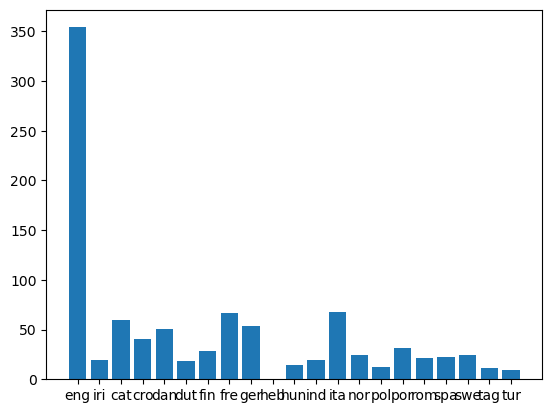

In [83]:
matplotlib.pyplot.bar(df['Languages Abbreviated'], df['Number of Stopwords'])

<BarContainer object of 20 artists>

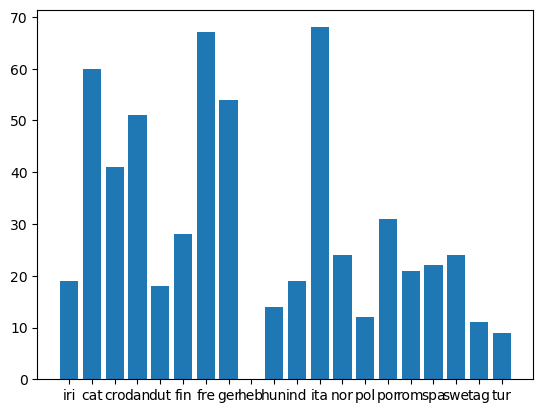

In [88]:
matplotlib.pyplot.bar(df['Languages Abbreviated'][1:], df['Number of Stopwords'][1:])

([<matplotlib.patches.Wedge at 0x1ed32f2e9e0>,
 [Text(0.42474160257542, 1.0146893963384382, 'eng'),
  Text(-0.8198155236621473, 0.733418371165162, 'iri'),
  Text(-0.9818407770285278, 0.49597246754635166, 'cat'),
  Text(-1.0903295952721062, 0.14553822066304578, 'cro'),
  Text(-1.0836735313041013, -0.18881651821516912, 'dan'),
  Text(-1.0125632311514248, -0.4297856476433183, 'dut'),
  Text(-0.9354647429782078, -0.5787103892662682, 'fin'),
  Text(-0.7100126878093309, -0.8401678303468718, 'fre'),
  Text(-0.32530975806373225, -1.0507966317554107, 'ger'),
  Text(-0.13286891051691493, -1.0919459018733704, 'heb'),
  Text(-0.08202972734680222, -1.0969371558258976, 'hun'),
  Text(0.038308492136328996, -1.099332733720888, 'ind'),
  Text(0.349621520696689, -1.0429596311774176, 'ita'),
  Text(0.6468590266340788, -0.8897041079269062, 'nor'),
  Text(0.7482537560868634, -0.8062979080351758, 'pol'),
  Text(0.8552814712456381, -0.6917323217429534, 'por'),
  Text(0.9613239449402241, -0.5346552841640725, 

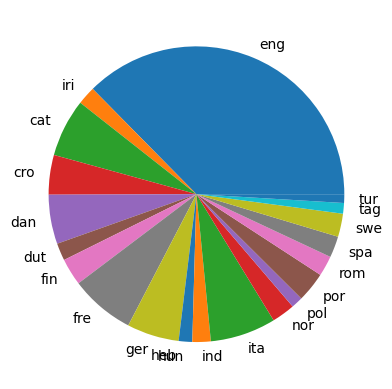

In [91]:
matplotlib.pyplot.pie(df['Number of Stopwords'], labels = df['Languages Abbreviated'])

([<matplotlib.patches.Wedge at 0x1ed32fc89d0>,
 [Text(1.0944320727510282, 0.11053704417021544, 'iri'),
  Text(0.955046800181636, 0.5457889788762854, 'cat'),
  Text(0.5432572100554384, 0.9564892073216411, 'cro'),
  Text(0.03204711514714615, 1.0995330747234235, 'dan'),
  Text(-0.3631105158442069, 1.0383403841146477, 'dut'),
  Text(-0.6029262412912272, 0.9200434487362176, 'fin'),
  Text(-0.9719103019702506, 0.5151605234527353, 'fre'),
  Text(-1.0870432954848015, -0.1683355985569982, 'ger'),
  Text(-0.9953593793544364, -0.4682517548617959, 'heb'),
  Text(-0.9579248744406732, -0.5407216797279545, 'hun'),
  Text(-0.8492707848694254, -0.6990988012915414, 'ind'),
  Text(-0.4497160901928437, -1.0038702297715887, 'ita'),
  Text(0.07279145263412164, -1.0975889050201877, 'nor'),
  Text(0.2795376911936904, -1.063888471223418, 'pol'),
  Text(0.5125842146023484, -0.9732715052545686, 'por'),
  Text(0.7579998481260163, -0.7971425407296592, 'rom'),
  Text(0.9184431315158537, -0.6053612261875982, 'spa'),

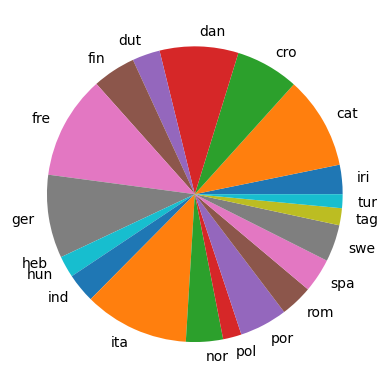

In [92]:
matplotlib.pyplot.pie(df['Number of Stopwords'][1:], labels = df['Languages Abbreviated'][1:])

# Conclusions

Seeing as I did use the English version of the novel, it is to no surprise that English is the most used language within the novel. In the end, the top non-English stopwords I discovered in the novel were Italian, French, Catalan, German, followed by Danish. Aside from Catalan, the remaining languages being so high up are not as much of a surprise since each of the respective countries are very close in proximity to Ireland so I can understand there being ease of access in learning some of the language. Catalan being the third highest non-English language in terms of stopwords was a very big surprise, though, considering I don't often hear much about the language and its distance geographically is quite a bit farther from the rest. The lack of Asian languages in the results does not surprise me though since most from the original advertools list would use their own characters and I would find it difficult to imagine Joyce trying to learn a lot of Asian languages just for the sake of the novel. 

Overall. I would say I learned a lot throughout this process. Although the results were not what I had initially hoped for, it was still interesting the amount of stopwords I was able to pull out from the different language databases. Even among the stopwords, i was surprised how low the amount of irish stopwords was in relation to the other languages. Given how many different language databases I used and how all of them ended up with zero I can assume that either there was a problem with the way I was coding the categorization process, which is possible but very unlikely since it worked for the stopwords or there really are just no direct words in different languages and rather Joyce may have combined parts of different languages into a word to create words. I would also say that this process was a more naive approach to some of the steps such as categorizing by language, as I had mentioned prior that there are better faster ways that I have now realized. 

Also, I have to acknowledge that even the sources I used for the list of words in each language are flawed as vocabulary in any language is constantly expanding with the creation of new words, especially slang words. Throughout this process, I have seen that while it is not the most difficult to find lists of words in different languages, it is still not the easiest to have very comprehensive lists and it is very space-consuming so that would be something to consider if I ever took on such a project again. Additionally, I would add that it is not always the easiest to have all the different lists of languages in one place (i.e. there are still some that are not part of the big comprehensive database of lists or you can only find single lists), which is considerably more preferable to try to clean the data. Another big thing I want to acknowledge is that while I used different language stopwords and was able to categorize a good portion of the words from foreign_list, I do have to acknowledge that it I cannot be completely sure if Joyce's inclusion of these words are actually him intentionally using the different stopwords from different languages, nor can I be certain that some of the words were just coincidentally the same as certain stopwords when in reality they were completely made-up words. I have my doubts on the second thought considering that it is well known that he used a variety of different languages in this work, but I also cannot be certain if some of the words considered stopwords were actually just cut off portions of longer words that were cut this way during the opening and reading process of the PDF file. 

Thus, this was a very interesting experimentand while I am disappointed I didn't get more interesting results or what I was originally anticipating, I am glad that I was able to get any at all. I am very curious about the remaining words in foreign_list as there are far more remaining than I would have anticipated, but that will have to be for another project to look into with new methods.